<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/2.2%20VISUALIZACI%C3%93N/DS_MultidimensionalDataI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dealing with Multidimensional Data I**



**Loading Data from Google Drive**

In [1]:
!pip install -U -q PyDrive

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:

downloaded = drive.CreateFile({'id':'1P3_2H_B-lR4zdCU5HRrprhoZ4ByxmqUM'}) # replace the id with id of file you want to access
downloaded.GetContentFile('wine.csv')

In [ ]:
import pandas as pd

series = pd.read_csv('wine.csv')
print(series.head())

## ***Processing***

### *Feature Selection*

#### Removing features with low variance

In [11]:
from sklearn.feature_selection import VarianceThreshold

X = [[0, 0, 1],
     [0, 1, 1],
     [1, 0, 1],
     [0, 1, 1],
     [0, 1, 1],
     [0, 1, 1]]

sel = VarianceThreshold(threshold=0.2)#remueve las caracteristicas de baja varianza
sel.fit_transform(X)#solo se queda con aquellas caracteristicas con mayor varianza
#Se reduce la dimension a traves de la varianza

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1]])

#### Univariate Selection

In [7]:
#feature_selection  seleccion de caracteristicas
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2#

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols',
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity',
         'Hue', 'OD280/OD315', 'Proline']

data = pd.read_csv(url, names=cols)

# print(data.shape)

X = data.iloc[:,1:12]  #independent columns
y = data.iloc[:,0]    #target column

#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(5,'Score'))  #print 5 best features

#se escogen las variables con mejor score

             Specs       Score
9   ColorIntensity  109.016647
6       Flavanoids   63.334308
4        Magnesium   45.026381
3  AlcalinityOfAsh   29.383695
1        MalicAcid   28.068605


#### Feature Importance

[0.18338538 0.06372201 0.04225805 0.05430504 0.04283502 0.09129739
 0.18295126 0.04567698 0.04387414 0.15579488 0.09389986]


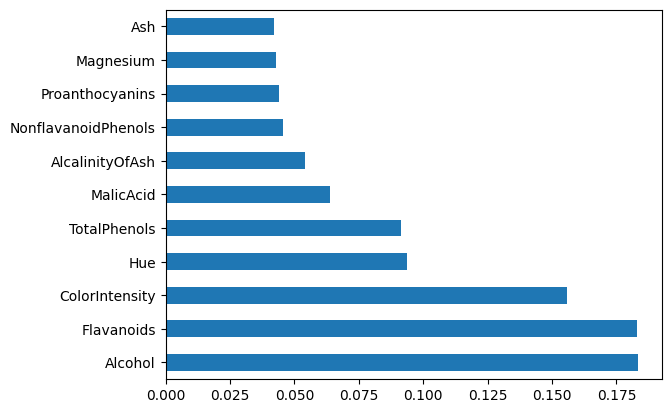

In [14]:
import pandas as pd
import numpy as np

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols',
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity',
         'Hue', 'OD280/OD315', 'Proline']
data = pd.read_csv(url, names=cols)

X = data.iloc[:,1:12]  #independent columns
y = data.iloc[:,0]    #target column

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(14).plot.barh()
plt.show()

#### Correlation Matrix with Heatmap

(178, 14)


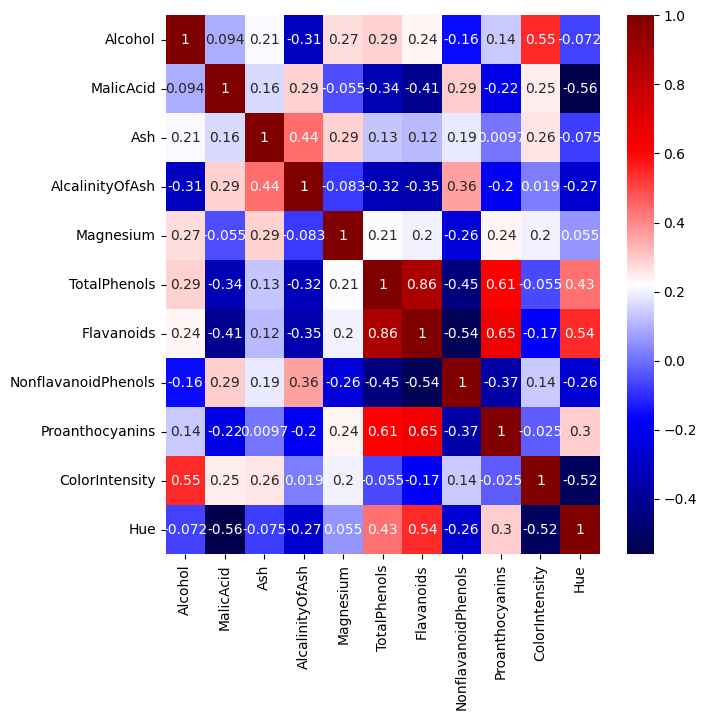

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols',
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity',
         'Hue', 'OD280/OD315', 'Proline']
data = pd.read_csv(url, names=cols)

print(data.shape)

X = data.iloc[:,1:12]  #independent columns
y = data.iloc[:,0]    #target column


#get correlations of each features in dataset
corrmat = X.corr(method="pearson")#es el mas conocido y usado
top_corr_features = corrmat.index
plt.figure(figsize=(7,7))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="seismic")

OTROS METODOS

### *Feature Extraction*

#### Principal Component Analysis (PCA)  
                                         


In [ ]:
#las variables son ortogonales una de la otra con ellos garantizamos que estan variables
#sean diferentes

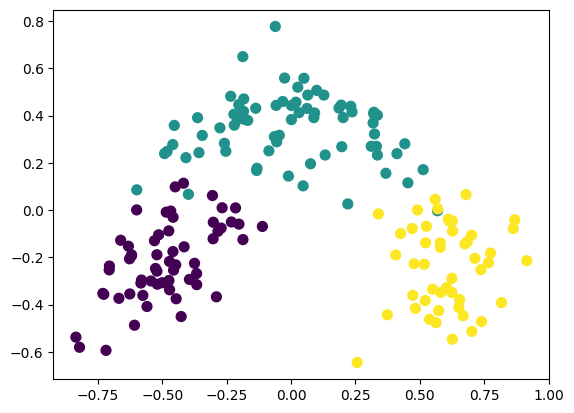

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols',
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity',
         'Hue', 'OD280/OD315', 'Proline']
data = pd.read_csv(url, names=cols)

y = data['Class']          # Split off classifications
X = data.loc[:, 'Alcohol':] # Split off features

X_norm = (X - X.min())/(X.max() - X.min()) # normalize

pca = sklearnPCA(n_components=2) #2-dimensional PCA

transformed = pd.DataFrame(pca.fit_transform(X_norm))

plt.scatter(transformed[0], transformed[1], c= y.astype(float), s=50)#se utiliza la clase para colorear
# plt.scatter(transformed[0], transformed[1], s=50)

plt.show()
#print(X_norm)

In [24]:
len(X_norm)

178

In [25]:
len(transformed)

178

#### Linear Discriminant Analysis (LDA)

In [ ]:
#es maximizar la separacion entre clases, se necesita la información de las clases osea data etiquetada

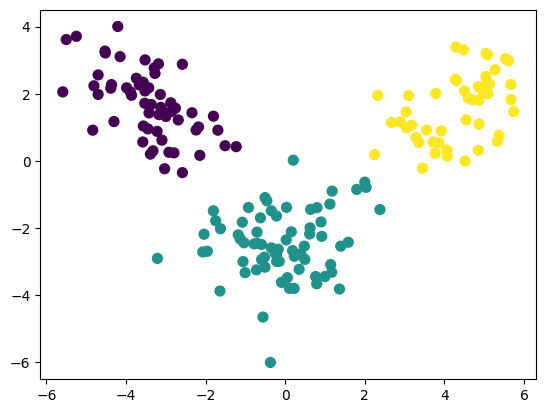

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols',
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity',
         'Hue', 'OD280/OD315', 'Proline']

data = pd.read_csv(url, names=cols)

y = data['Class']          # Split off classifications
X = data.loc[:, 'Alcohol':] # Split off features

X_norm = (X - X.min())/(X.max() - X.min()) # normalize

lda = LDA(n_components=2) #2-dimensional LDA

lda_transformed = pd.DataFrame(lda.fit_transform(X_norm, y))#se incluye las la x y la y

# plt.scatter(lda_transformed[0], lda_transformed[1], s=50)
plt.scatter(lda_transformed[0], lda_transformed[1], c= y.astype(float), s=50)

plt.show()

#### t-distributed Stochastic Neighbor Embedding (tSNE)
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [ ]:
#EL ESTADO DEL  ARTE, tsne  es el nuevo PCA
#SNE es no lineal, encuentrar la similitudes de la vencindad del espacio original
#al espacio proyectado, metodo robusto funciona mejor que el PCA
#computacionalmente caro proyectar a 2  dimensiones

El objetivo principal de t-SNE es mantener la proximidad de los puntos en el espacio de alta dimensión cuando se proyectan en un espacio de menor dimensión

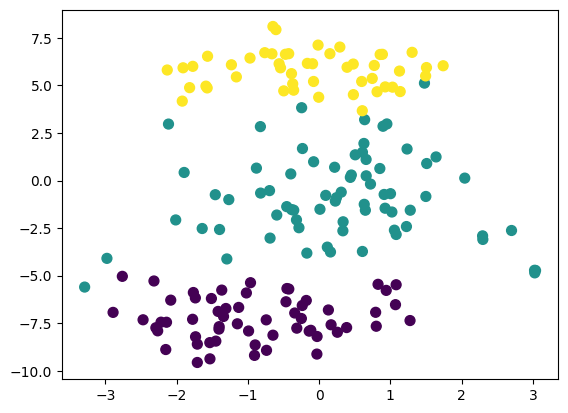

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.manifold import TSNE


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols',
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity',
         'Hue', 'OD280/OD315', 'Proline']

data = pd.read_csv(url, names=cols)

y = data['Class']          # Split off classifications
X = data.loc[:, 'Alcohol':] # Split off features

X_norm = (X - X.min())/(X.max() - X.min())

# n_iter= number of iterations
# perplexity = (1 local, bigger global)
X_tsne = TSNE(n_components=2, perplexity=50).fit_transform(X_norm)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y.astype(float), s=50)

plt.show()

In [31]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 9.6 MB/s eta 0:00:00


#### Uniform Manifold Approximation and Projection (UMAP)

Reduccional de dimensionalidad no lineal no es tan costoso computacionalmente como tSNE

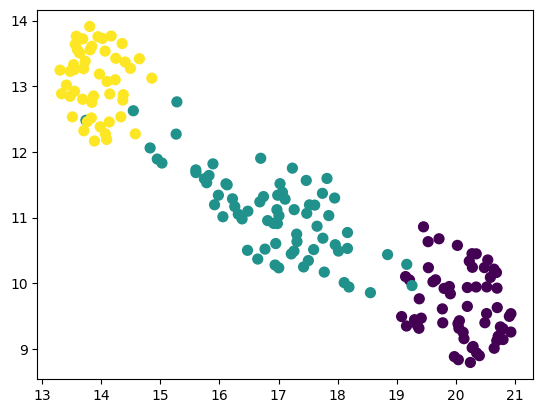

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

import umap

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols',
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity',
         'Hue', 'OD280/OD315', 'Proline']

data = pd.read_csv(url, names=cols)

y = data['Class']          # Split off classifications
X = data.loc[:, 'Alcohol':] # Split off features

X_norm = (X - X.min())/(X.max() - X.min())

u = umap.UMAP(n_neighbors=70, min_dist=0.0, n_components=2, metric='euclidean')
X_umap = u.fit_transform(X_norm)

plt.scatter(X_umap[:,0], X_umap[:,1], c=y.astype(float), s=50)

plt.show()